In [7]:
pip install pandas matplotlib scipy


   ---------------------------------------- 0.0/38.4 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.4 MB 6.3 MB/s eta 0:00:06
   --- ------------------------------------ 2.9/38.4 MB 7.6 MB/s eta 0:00:05
   ----- ---------------------------------- 5.5/38.4 MB 9.3 MB/s eta 0:00:04
   --------- ------------------------------ 8.7/38.4 MB 11.0 MB/s eta 0:00:03
   ------------- -------------------------- 12.8/38.4 MB 13.0 MB/s eta 0:00:02
   ------------------- -------------------- 19.1/38.4 MB 15.9 MB/s eta 0:00:02
   ---------------------------- ----------- 27.3/38.4 MB 19.2 MB/s eta 0:00:01
   -------------------------------------- - 37.2/38.4 MB 23.0 MB/s eta 0:00:01
   ---------------------------------------- 38.4/38.4 MB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


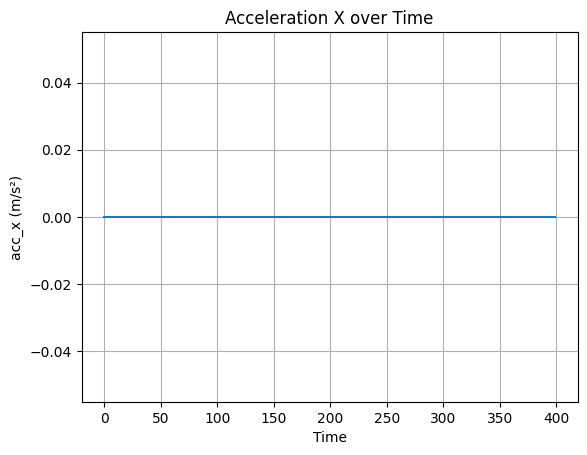

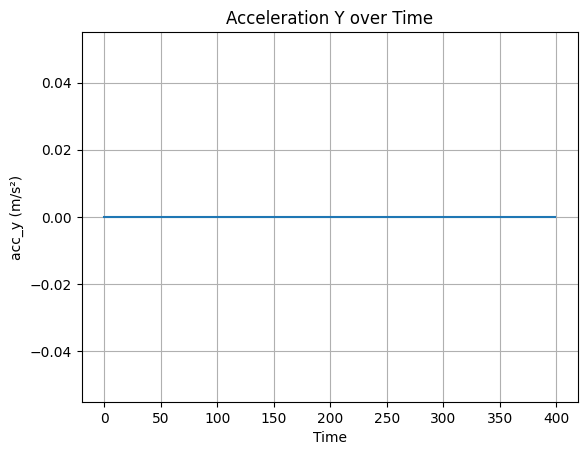

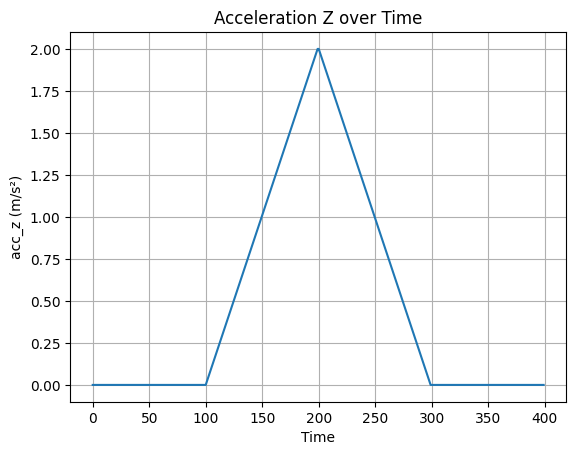

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'data.csv' with the path to your file
df = pd.read_csv('data.csv') 
# If you have a timestamp column (e.g. 'time'), uncomment below:
# time = pd.to_datetime(df['time'])
# Otherwise, use the row index as the x‑axis:
time = df.index

# Plot acc_x
plt.figure()
plt.plot(time, df['acc_x'])
plt.title('Acceleration X over Time')
plt.xlabel('Time')
plt.ylabel('acc_x (m/s²)')
plt.grid(True)

# Plot acc_y
plt.figure()
plt.plot(time, df['acc_y'])
plt.title('Acceleration Y over Time')
plt.xlabel('Time')
plt.ylabel('acc_y (m/s²)')
plt.grid(True)

# Plot acc_z
plt.figure()
plt.plot(time, df['acc_z'])
plt.title('Acceleration Z over Time')
plt.xlabel('Time')
plt.ylabel('acc_z (m/s²)')
plt.grid(True)

plt.show()


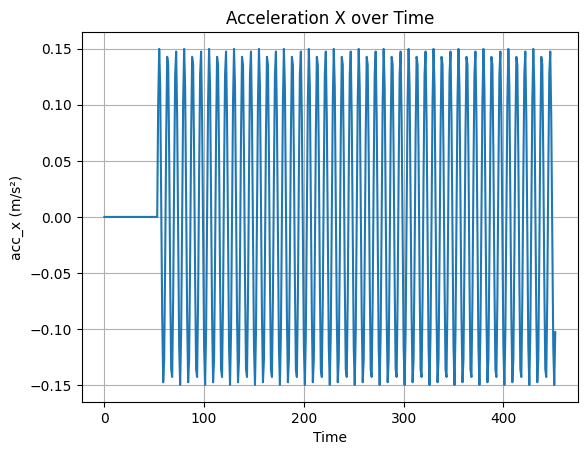

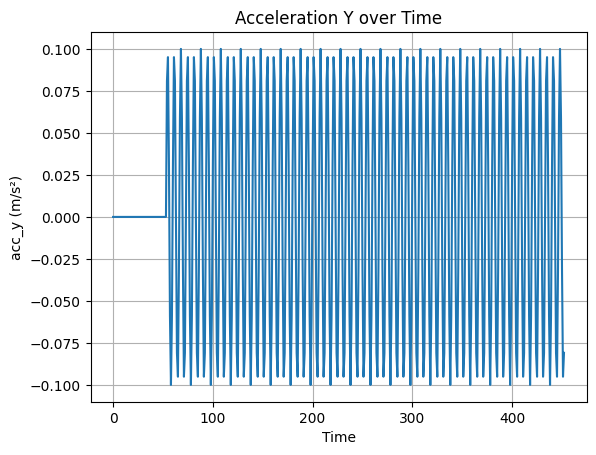

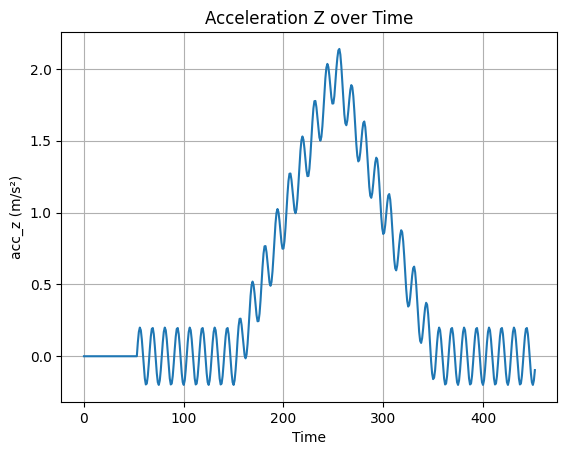

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'ddata_with_ripples.csv' with the path to your file
df = pd.read_csv('data_with_ripples.csv')
# If you have a timestamp column (e.g. 'time'), uncomment below:
# time = pd.to_datetime(df['time'])
# Otherwise, use the row index as the x‑axis:
time = df.index

# Plot acc_x
plt.figure()
plt.plot(time, df['acc_x'])
plt.title('Acceleration X over Time')
plt.xlabel('Time')
plt.ylabel('acc_x (m/s²)')
plt.grid(True)

# Plot acc_y
plt.figure()
plt.plot(time, df['acc_y'])
plt.title('Acceleration Y over Time')
plt.xlabel('Time')
plt.ylabel('acc_y (m/s²)')
plt.grid(True)

# Plot acc_z
plt.figure()
plt.plot(time, df['acc_z'])
plt.title('Acceleration Z over Time')
plt.xlabel('Time')
plt.ylabel('acc_z (m/s²)')
plt.grid(True)

plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_20400\694245625.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ripple_starts = np.where(ripple_mask & ~ripple_mask.shift(1).fillna(False))[0]


No takeoff detected


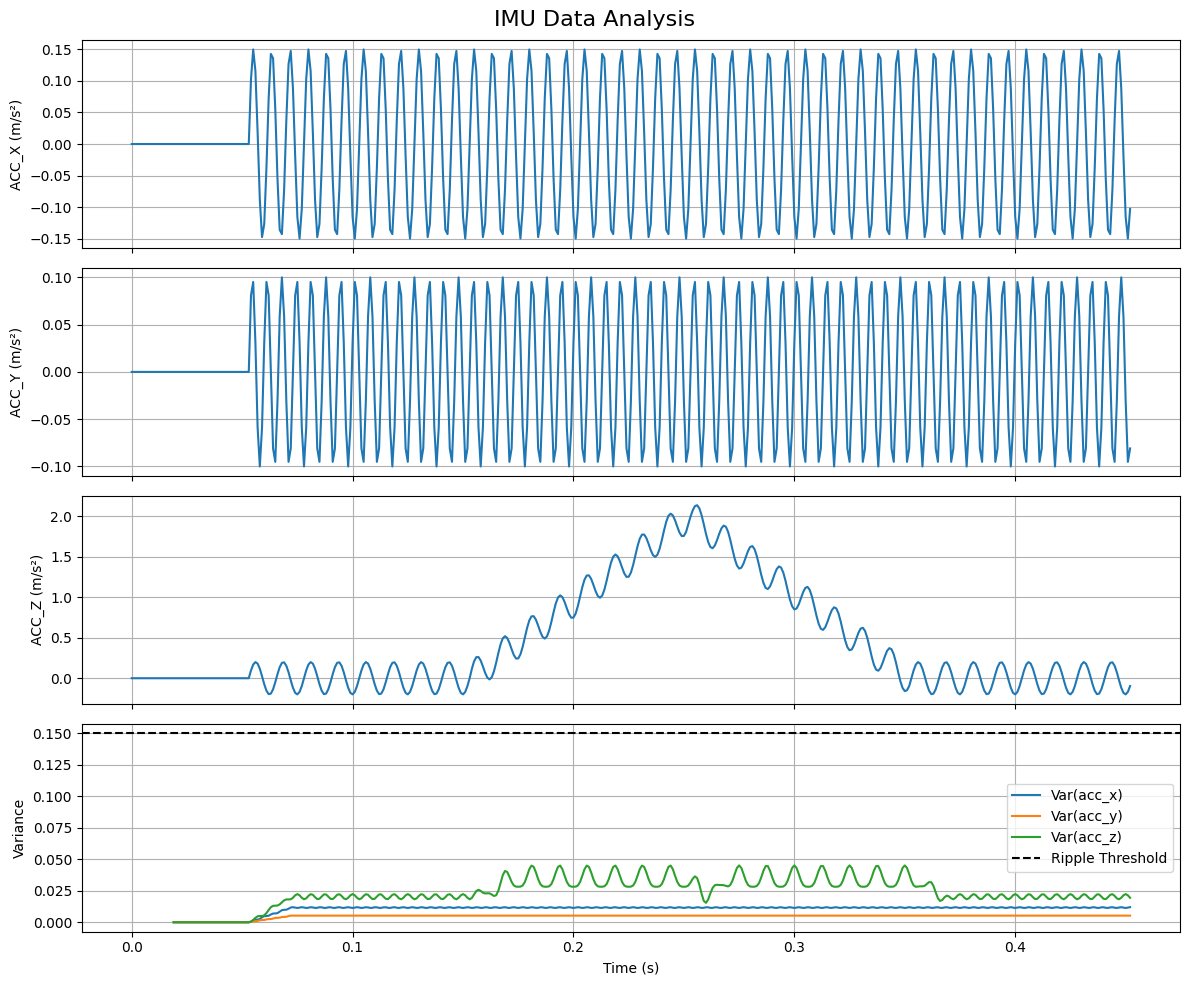

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuration parameters - ADJUST THESE AS NEEDED
CSV_FILE = 'data_with_ripples.csv'           # Path to your CSV file
TIME_COL = 'time'                   # Name of time column (if exists)
ACC_COLS = ['acc_x', 'acc_y', 'acc_z']  # Names of accelerometer columns
RIPPLE_WINDOW = 20                  # Window size for ripple detection (samples)
Z_WINDOW = 15                       # Window size for z-change detection (samples)
RIPPLE_THRESHOLD = 0.15             # Variance threshold for ripple detection
Z_CHANGE_THRESHOLD = 2.0            # Minimum z-change for takeoff detection
PLOT = True                         # Set to False to disable plotting

def detect_takeoff(data):
    """Detect takeoff sequence in IMU data"""
    # Calculate variances for ripple detection
    variances = data[ACC_COLS].rolling(RIPPLE_WINDOW).var()
    
    # Find ripple candidates (all axes simultaneously)
    ripple_mask = (variances[ACC_COLS] > RIPPLE_THRESHOLD).all(axis=1)
    ripple_starts = np.where(ripple_mask & ~ripple_mask.shift(1).fillna(False))[0]
    
    # Check each ripple candidate for takeoff pattern
    for start in ripple_starts:
        end = start + RIPPLE_WINDOW
        
        # Look for z-axis change after ripples
        z_window = data['acc_z'].iloc[end:end + Z_WINDOW]
        z_change = z_window.max() - z_window.min()
        
        # Look for subsequent ripples after z-change
        post_ripple = variances.iloc[end + Z_WINDOW:end + Z_WINDOW + RIPPLE_WINDOW]
        has_second_ripple = (post_ripple[ACC_COLS] > RIPPLE_THRESHOLD).all(axis=1).any()
        
        if z_change > Z_CHANGE_THRESHOLD and has_second_ripple:
            return start  # Takeoff detected at this ripple start
    
    return -1  # No takeoff detected

# Read and prepare data
data = pd.read_csv(CSV_FILE)

# Handle time axis
time = data.index / 1000  # Default to sample index (kHz assumed)
if TIME_COL in data.columns:
    time = data[TIME_COL]

# Detect takeoff
takeoff_index = detect_takeoff(data)
if takeoff_index >= 0:
    print(f"Takeoff detected at index {takeoff_index} (time: {time[takeoff_index]:.2f}s)")
else:
    print("No takeoff detected")

# Plotting
if PLOT:
    fig, ax = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
    plt.suptitle("IMU Data Analysis", fontsize=16)
    
    # Plot acceleration data
    for i, col in enumerate(ACC_COLS):
        ax[i].plot(time, data[col], label=col.upper())
        ax[i].set_ylabel(f"{col.upper()} (m/s²)")
        ax[i].grid(True)
        
        # Mark takeoff if detected
        if takeoff_index >= 0:
            ax[i].axvline(time[takeoff_index], color='r', linestyle='--', 
                         label='Takeoff Start')
    
    # Plot variances
    variances = data[ACC_COLS].rolling(RIPPLE_WINDOW).var()
    ax[3].plot(time, variances, label=[f'Var({col})' for col in ACC_COLS])
    ax[3].axhline(RIPPLE_THRESHOLD, color='k', linestyle='--', label='Ripple Threshold')
    ax[3].set_ylabel("Variance")
    ax[3].set_xlabel("Time (s)")
    ax[3].grid(True)
    ax[3].legend()
    
    plt.tight_layout()
    plt.show()

No zero-to-active transition found - using variance method
Ripple start detected at index: 62
Takeoff detected at index: 191


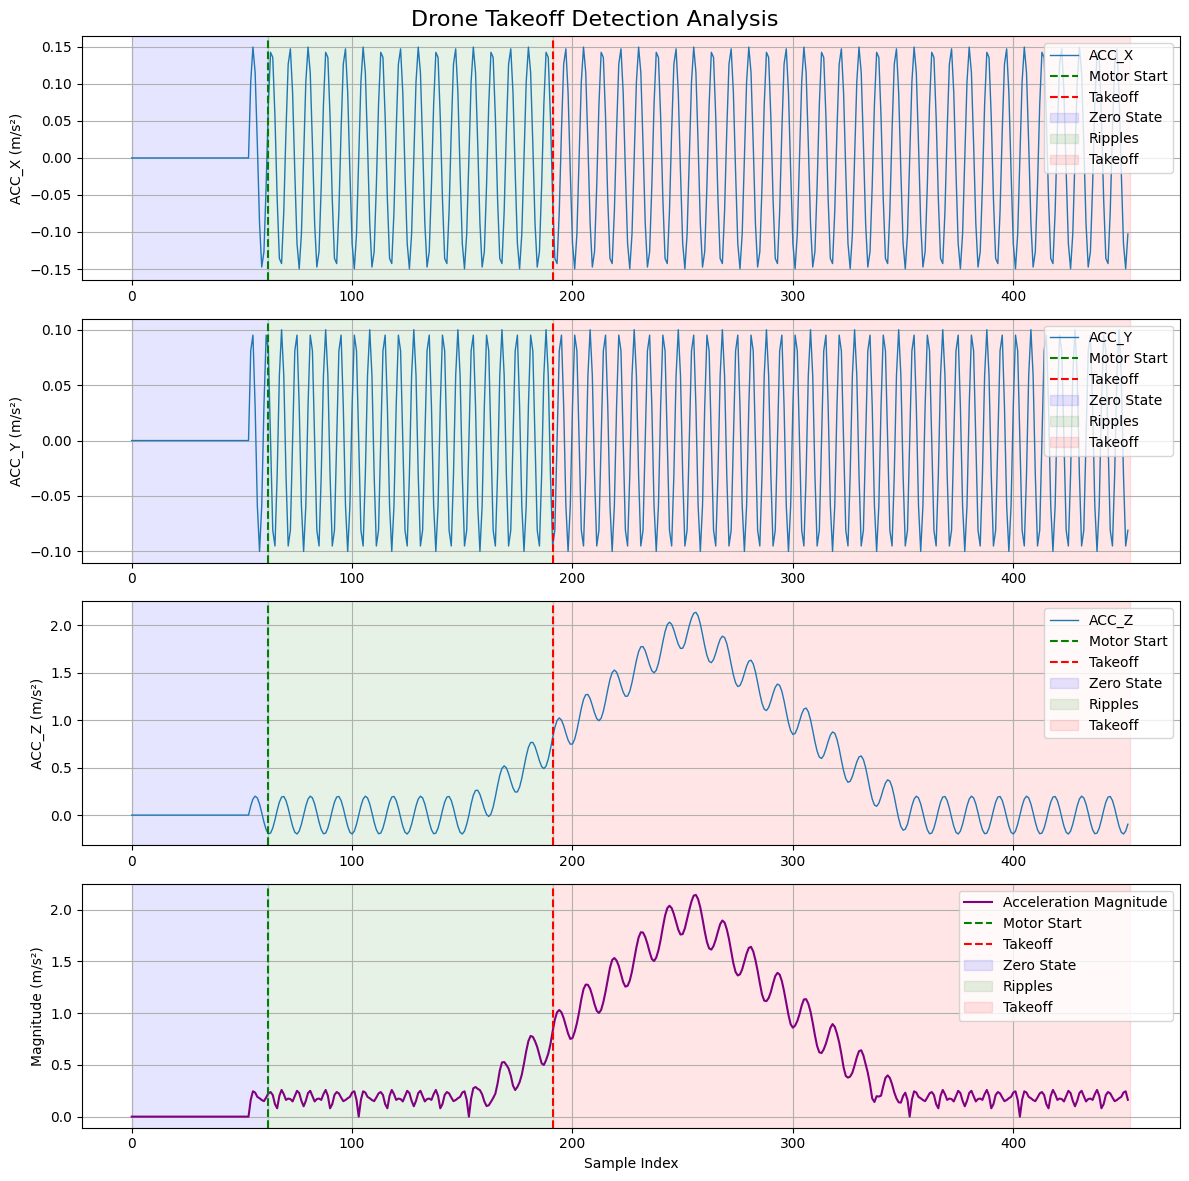

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Configuration parameters - ADJUST AS NEEDED
CSV_FILE = 'data_with_ripples.csv'  # Your data file
ACC_COLS = ['acc_x', 'acc_y', 'acc_z']  # Names of accelerometer columns
RIPPLE_WINDOW = 20                   # Window size for ripple detection
Z_WINDOW = 50                        # Window size for z-change detection
RIPPLE_THRESHOLD = 0.005             # Lowered variance threshold for ripples
Z_CHANGE_THRESHOLD = 1.0             # Minimum z-change for takeoff detection
PLOT = True                          # Set to False to disable plotting

def detect_takeoff(data):
    """Detect takeoff sequence in IMU data"""
    # Calculate magnitude of acceleration
    data['acc_mag'] = np.sqrt(data[ACC_COLS[0]]**2 + 
                             data[ACC_COLS[1]]**2 + 
                             data[ACC_COLS[2]]**2)
    
    # Find initial zero period (where magnitude < 0.01)
    is_zero = data['acc_mag'] < 0.01
    zero_to_active = np.where(is_zero[:-1] & ~is_zero[1:])[0]
    
    if len(zero_to_active) == 0:
        print("No zero-to-active transition found - using variance method")
        # Calculate variance for all axes
        variances = data[ACC_COLS].rolling(RIPPLE_WINDOW).var().mean(axis=1)
        
        # Find first significant ripple
        ripple_start = np.where(variances > RIPPLE_THRESHOLD)[0]
        if len(ripple_start) == 0:
            print("No ripples detected")
            return -1, -1
        transition_idx = ripple_start[0]
    else:
        # Use the first significant transition
        transition_idx = zero_to_active[0]
    
    print(f"Ripple start detected at index: {transition_idx}")
    
    # Step 2: Detect significant z-axis change after ripples
    # Look for significant z-axis change after the ripples
    z_data = data['acc_z'].iloc[transition_idx:]
    z_change = z_data.rolling(Z_WINDOW).max() - z_data.rolling(Z_WINDOW).min()
    
    # Find where z-change exceeds threshold
    takeoff_candidates = np.where(z_change > Z_CHANGE_THRESHOLD)[0]
    
    if len(takeoff_candidates) == 0:
        print("No significant z-change detected")
        return transition_idx, -1
    
    # First candidate after transition
    takeoff_idx = takeoff_candidates[0] + transition_idx
    print(f"Takeoff detected at index: {takeoff_idx}")
    
    return transition_idx, takeoff_idx

# Read and prepare data
data = pd.read_csv(CSV_FILE)

# Detect takeoff
transition_idx, takeoff_idx = detect_takeoff(data)

# Create time axis (sample indices)
time = np.arange(len(data))

# Plotting
if PLOT:
    fig, ax = plt.subplots(4, 1, figsize=(12, 12))
    plt.suptitle("Drone Takeoff Detection Analysis", fontsize=16)
    
    # Plot acceleration data
    for i, col in enumerate(ACC_COLS):
        ax[i].plot(time, data[col], label=col.upper(), linewidth=1)
        ax[i].set_ylabel(f"{col.upper()} (m/s²)")
        ax[i].grid(True)
        
        # Mark transitions if detected
        if transition_idx > 0:
            ax[i].axvline(transition_idx, color='g', linestyle='--', 
                         label='Motor Start')
        if takeoff_idx > 0:
            ax[i].axvline(takeoff_idx, color='r', linestyle='--', 
                         label='Takeoff')
    
    # Plot magnitude and transitions
    ax[3].plot(time, data['acc_mag'], label='Acceleration Magnitude', color='purple')
    if transition_idx > 0:
        ax[3].axvline(transition_idx, color='g', linestyle='--', label='Motor Start')
    if takeoff_idx > 0:
        ax[3].axvline(takeoff_idx, color='r', linestyle='--', label='Takeoff')
    ax[3].set_ylabel("Magnitude (m/s²)")
    ax[3].set_xlabel("Sample Index")
    ax[3].grid(True)
    ax[3].legend()
    
    # Add shaded regions if transitions detected
    if transition_idx > 0 and takeoff_idx > 0:
        for a in ax:
            a.axvspan(0, transition_idx, alpha=0.1, color='blue', label='Zero State')
            a.axvspan(transition_idx, takeoff_idx, alpha=0.1, color='green', label='Ripples')
            a.axvspan(takeoff_idx, len(data), alpha=0.1, color='red', label='Takeoff')
            a.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

No zero-to-active transition found - using variance method
Ripple start detected at index: 62
Z-axis after ripples start: max=2.139, mean=0.577
Looking for sustained values > 0.5
Index 62: avg Z = 0.137, raw Z = -0.196
Index 82: avg Z = 0.117, raw Z = 0.181
Index 102: avg Z = 0.111, raw Z = -0.096
Index 122: avg Z = 0.125, raw Z = -0.025
Index 142: avg Z = 0.144, raw Z = 0.137
Index 162: avg Z = 0.298, raw Z = -0.015
Z-axis takeoff start detected at index: 163 (avg Z: 0.333)
Z-axis return to ripples detected at index: 332 (avg Z: 0.270)
Stabilization (all ripples again) detected at index: 351


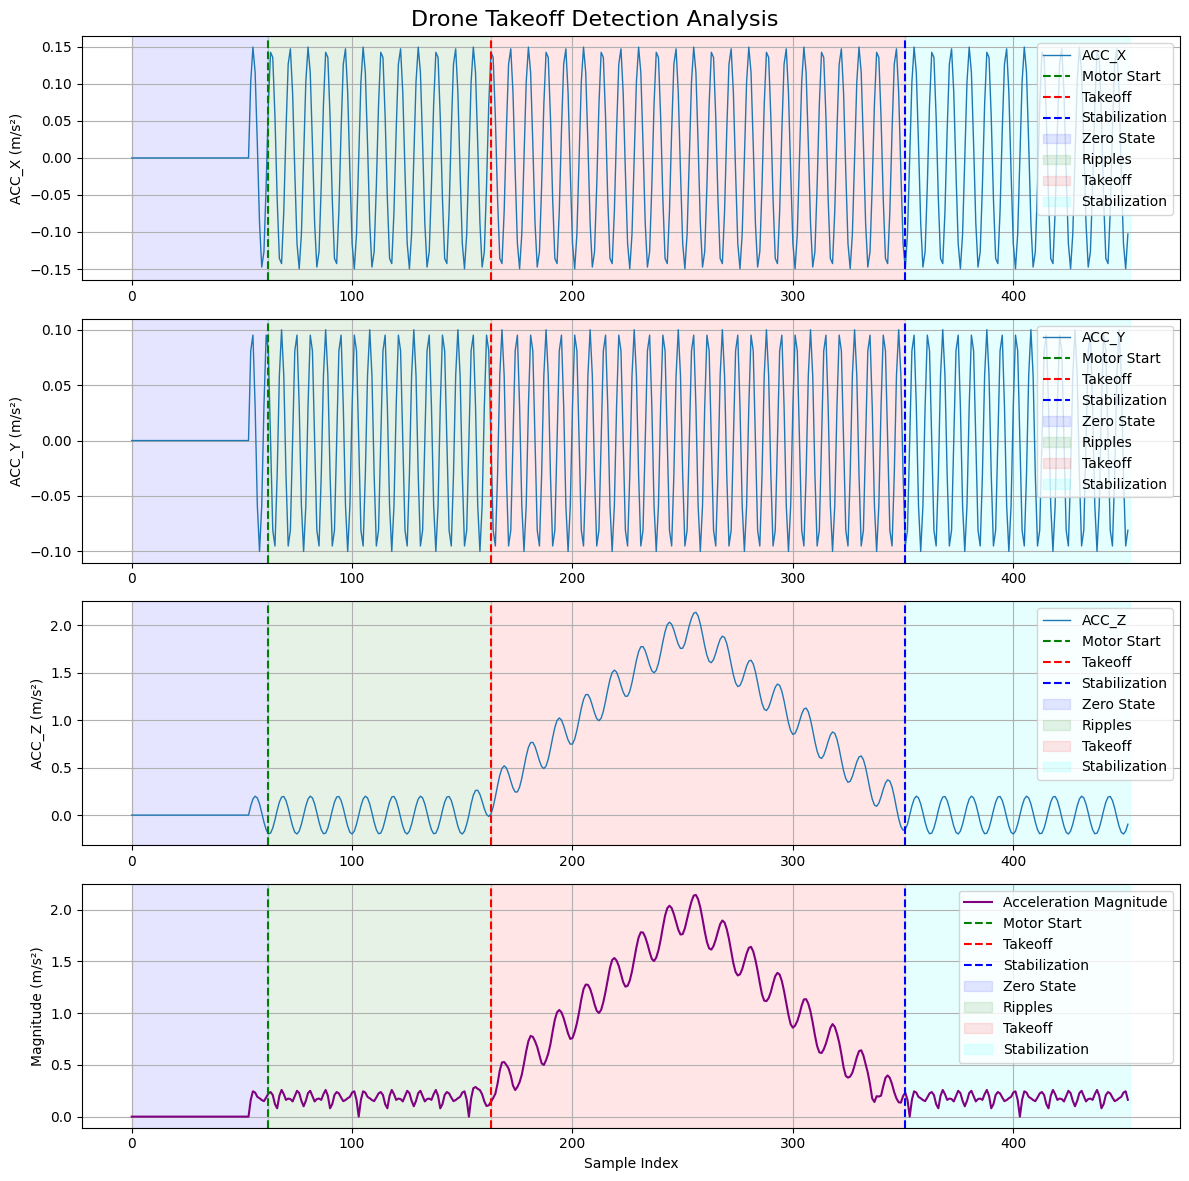

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Configuration parameters - ADJUST AS NEEDED
CSV_FILE = 'data_with_ripples.csv'  # Your data file
ACC_COLS = ['acc_x', 'acc_y', 'acc_z']  # Names of accelerometer columns
RIPPLE_WINDOW = 20                   # Window size for ripple detection
Z_WINDOW = 50                        # Window size for z-change detection
RIPPLE_THRESHOLD = 0.005             # Lowered variance threshold for ripples
Z_CHANGE_THRESHOLD = 1.0             # Minimum z-change for takeoff detection
PLOT = True                          # Set to False to disable plotting

def detect_takeoff(data):
    """Detect takeoff sequence in IMU data"""
    # Calculate magnitude of acceleration
    data['acc_mag'] = np.sqrt(data[ACC_COLS[0]]**2 + 
                             data[ACC_COLS[1]]**2 + 
                             data[ACC_COLS[2]]**2)
    
    # Find initial zero period (where magnitude < 0.01)
    is_zero = data['acc_mag'] < 0.01
    zero_to_active = np.where(is_zero[:-1] & ~is_zero[1:])[0]
    
    if len(zero_to_active) == 0:
        print("No zero-to-active transition found - using variance method")
        # Calculate variance for all axes
        variances = data[ACC_COLS].rolling(RIPPLE_WINDOW).var().mean(axis=1)
        
        # Find first significant ripple
        ripple_start = np.where(variances > RIPPLE_THRESHOLD)[0]
        if len(ripple_start) == 0:
            print("No ripples detected")
            return -1, -1
        transition_idx = ripple_start[0]
    else:
        # Use the first significant transition
        transition_idx = zero_to_active[0]
    
    print(f"Ripple start detected at index: {transition_idx}")
    
    # Step 3: Detect Z-axis pattern: ripples -> sustained big values -> ripples again
    # Calculate Z-axis absolute values after motor start
    z_data = data['acc_z'].iloc[transition_idx:]
    z_abs = np.abs(z_data)
    z_variance = z_data.rolling(RIPPLE_WINDOW).var()
    
    # Debug: print Z-axis statistics
    print(f"Z-axis after ripples start: max={z_abs.max():.3f}, mean={z_abs.mean():.3f}")
    print(f"Looking for sustained values > {Z_CHANGE_THRESHOLD/2}")
    
    # Find where Z-axis values become significantly larger (takeoff start)
    takeoff_idx = -1
    z_return_to_ripples_idx = -1
    
    # Look for sustained high Z values (not just ripples)
    for i in range(len(z_abs) - 10):
        avg_z = z_abs.iloc[i:i+10].mean()
        if i % 20 == 0:  # Debug: print every 20th sample
            actual_idx = transition_idx + i
            print(f"Index {actual_idx}: avg Z = {avg_z:.3f}, raw Z = {z_data.iloc[i]:.3f}")
        
        # Check if Z values become significantly larger than ripple level  
        if avg_z > 0.3:  # Even lower threshold
            takeoff_idx = transition_idx + i
            print(f"Z-axis takeoff start detected at index: {takeoff_idx} (avg Z: {avg_z:.3f})")
            
            # Now look for return to small values (ripples again)
            for j in range(i + 50, len(z_abs)):  # Look ahead for return to small values
                avg_z_later = z_abs.iloc[j:j+10].mean() if j+10 < len(z_abs) else z_abs.iloc[j:].mean()
                if avg_z_later < 0.3:  # Back to small ripple-like values
                    z_return_to_ripples_idx = transition_idx + j
                    print(f"Z-axis return to ripples detected at index: {z_return_to_ripples_idx} (avg Z: {avg_z_later:.3f})")
                    break
            break
    
    if takeoff_idx == -1:
        print("No Z-axis sustained high values pattern detected")
        return transition_idx, -1, -1
    
    if z_return_to_ripples_idx == -1:
        print("Z-axis takeoff detected but no return to ripples found")
        return transition_idx, takeoff_idx, -1
    
    # Step 4: Detect when all axes return to ripples (stabilization)
    # Calculate variance for all axes after Z returns to ripples
    post_z_data = data.iloc[z_return_to_ripples_idx:]
    post_variances = post_z_data[ACC_COLS].rolling(RIPPLE_WINDOW).var().mean(axis=1)
    
    # Find where all axes are rippling again
    stabilization_candidates = np.where(post_variances > RIPPLE_THRESHOLD)[0]
    
    if len(stabilization_candidates) == 0:
        print("No stabilization (all ripples again) detected")
        return transition_idx, takeoff_idx, -1
    
    # First sustained ripple period after Z returns to ripples
    stabilization_idx = stabilization_candidates[0] + z_return_to_ripples_idx
    print(f"Stabilization (all ripples again) detected at index: {stabilization_idx}")
    
    return transition_idx, takeoff_idx, stabilization_idx

# Read and prepare data
data = pd.read_csv(CSV_FILE)

# Detect takeoff
transition_idx, takeoff_idx, stabilization_idx = detect_takeoff(data)

# Create time axis (sample indices)
time = np.arange(len(data))

# Plotting
if PLOT:
    fig, ax = plt.subplots(4, 1, figsize=(12, 12))
    plt.suptitle("Drone Takeoff Detection Analysis", fontsize=16)
    
    # Plot acceleration data
    for i, col in enumerate(ACC_COLS):
        ax[i].plot(time, data[col], label=col.upper(), linewidth=1)
        ax[i].set_ylabel(f"{col.upper()} (m/s²)")
        ax[i].grid(True)
        
        # Mark transitions if detected
        if transition_idx > 0:
            ax[i].axvline(transition_idx, color='g', linestyle='--', 
                         label='Motor Start')
        if takeoff_idx > 0:
            ax[i].axvline(takeoff_idx, color='r', linestyle='--', 
                         label='Takeoff')
        if stabilization_idx > 0:
            ax[i].axvline(stabilization_idx, color='b', linestyle='--', 
                         label='Stabilization')
    
    # Plot magnitude and transitions
    ax[3].plot(time, data['acc_mag'], label='Acceleration Magnitude', color='purple')
    if transition_idx > 0:
        ax[3].axvline(transition_idx, color='g', linestyle='--', label='Motor Start')
    if takeoff_idx > 0:
        ax[3].axvline(takeoff_idx, color='r', linestyle='--', label='Takeoff')
    if stabilization_idx > 0:
        ax[3].axvline(stabilization_idx, color='b', linestyle='--', label='Stabilization')
    ax[3].set_ylabel("Magnitude (m/s²)")
    ax[3].set_xlabel("Sample Index")
    ax[3].grid(True)
    ax[3].legend()
    
    # Add shaded regions if transitions detected
    if transition_idx > 0 and takeoff_idx > 0:
        for a in ax:
            a.axvspan(0, transition_idx, alpha=0.1, color='blue', label='Zero State')
            a.axvspan(transition_idx, takeoff_idx, alpha=0.1, color='green', label='Ripples')
            if stabilization_idx > 0:
                a.axvspan(takeoff_idx, stabilization_idx, alpha=0.1, color='red', label='Takeoff')
                a.axvspan(stabilization_idx, len(data), alpha=0.1, color='cyan', label='Stabilization')
            else:
                a.axvspan(takeoff_idx, len(data), alpha=0.1, color='red', label='Takeoff')
            a.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

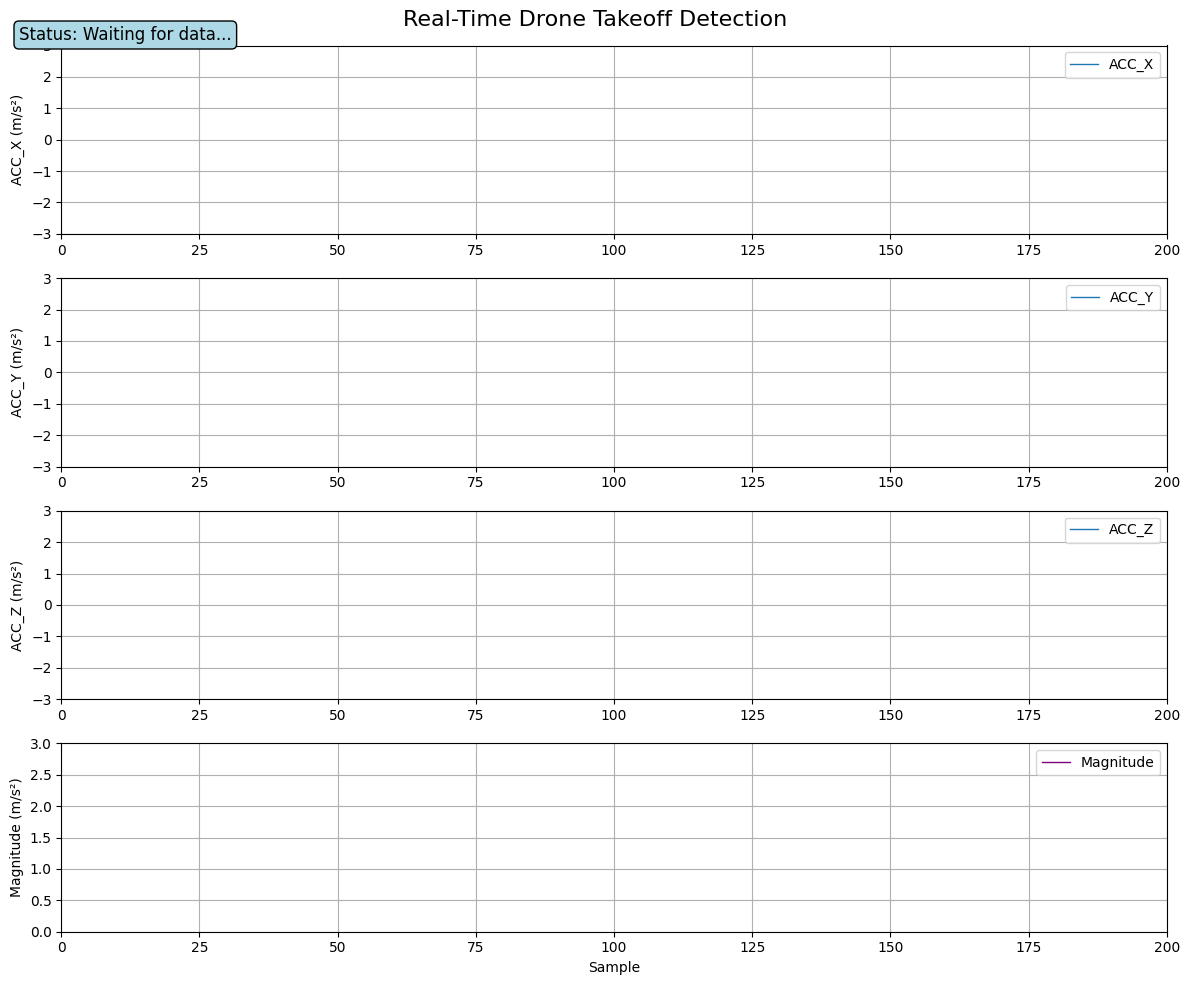

c:\Users\ahmed\anaconda3\envs\IOT\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


❌ SEQUENCE RESET: Invalid transition from zeros - Starting over from step 1
❌ SEQUENCE RESET: Invalid transition from zeros - Starting over from step 1
❌ SEQUENCE RESET: Invalid transition from zeros - Starting over from step 1
❌ SEQUENCE RESET: Invalid transition from zeros - Starting over from step 1
❌ SEQUENCE RESET: Invalid transition from zeros - Starting over from step 1
❌ SEQUENCE RESET: Invalid transition from zeros - Starting over from step 1
✓ Step 1->2: Zero to Ripples transition at sample 61 (IMMEDIATE)
✓ Step 2->3: Ripples to Z-high at sample 173 (after 0 samples in ripples)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.signal import find_peaks
import serial
import time
from collections import deque
import threading

# Configuration parameters - ADJUST AS NEEDED
SERIAL_PORT = 'COM3'                 # Serial port for live data
BAUD_RATE = 115200                   # Baud rate for serial communication
CSV_FILE = 'data_with_ripples.csv'  # Backup data file for testing
ACC_COLS = ['acc_x', 'acc_y', 'acc_z']  # Names of accelerometer columns
RIPPLE_WINDOW = 20                   # Window size for ripple detection
Z_WINDOW = 50                        # Window size for z-change detection
RIPPLE_THRESHOLD = 0.005             # Lowered variance threshold for ripples
Z_CHANGE_THRESHOLD = 1.0             # Minimum z-change for takeoff detection
BUFFER_SIZE = 500                    # Number of samples to keep in buffer
PLOT_WINDOW = 200                    # Number of samples to show in plot
USE_LIVE_DATA = False                 # Set to False to use CSV file instead

class RealTimeDroneDetector:
    def __init__(self):
        self.data_buffer = {
            'acc_x': deque(maxlen=BUFFER_SIZE),
            'acc_y': deque(maxlen=BUFFER_SIZE),
            'acc_z': deque(maxlen=BUFFER_SIZE),
            'timestamp': deque(maxlen=BUFFER_SIZE)
        }
        
        # Takeoff detection state with strict sequence validation
        self.takeoff_state = 'waiting'  # waiting, ripples, takeoff, stabilized
        self.transition_idx = -1
        self.takeoff_idx = -1
        self.stabilization_idx = -1
        self.sample_count = 0
        
        # Sequence validation variables (NO STATIC TIMING!)
        self.sequence_step = 1  # 1=zeros, 2=ripples, 3=Z_high_then_ripples, 4=stable_ripples
        self.z_high_detected = False  # Track if Z went high during step 3
        self.min_stable_samples = 10  # Minimum samples to confirm stability (not max time!)
        self.stable_count = 0    # Counter for stable samples
        self.step_start_sample = 0   # When current step started (for reference only)
        
        # Serial connection
        self.serial_conn = None
        self.running = False
        
        # Setup plot
        self.fig, self.axes = plt.subplots(4, 1, figsize=(12, 10))
        self.fig.suptitle("Real-Time Drone Takeoff Detection", fontsize=16)
        
        # Initialize plot lines
        self.lines = {}
        self.time_data = deque(maxlen=PLOT_WINDOW)
        
        # Detection markers for visualization
        self.detection_markers = {
            'motor_start': [],
            'takeoff': [],
            'stabilization': []
        }
        
        for i, col in enumerate(ACC_COLS):
            self.lines[col], = self.axes[i].plot([], [], label=col.upper(), linewidth=1)
            self.axes[i].set_ylabel(f"{col.upper()} (m/s²)")
            self.axes[i].grid(True)
            self.axes[i].legend()
            self.axes[i].set_xlim(0, PLOT_WINDOW)
            self.axes[i].set_ylim(-3, 3)
        
        # Magnitude plot
        self.lines['magnitude'], = self.axes[3].plot([], [], label='Magnitude', color='purple', linewidth=1)
        self.axes[3].set_ylabel("Magnitude (m/s²)")
        self.axes[3].set_xlabel("Sample")
        self.axes[3].grid(True)
        self.axes[3].legend()
        self.axes[3].set_xlim(0, PLOT_WINDOW)
        self.axes[3].set_ylim(0, 3)
        
        # Status text
        self.status_text = self.fig.text(0.02, 0.95, "Status: Waiting for data...", fontsize=12, 
                                       bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        
        # Detection status text (larger and more prominent)
        self.detection_text = self.fig.text(0.5, 0.02, "", fontsize=16, ha='center',
                                          bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black"))
        
    def connect_serial(self):
        """Connect to serial port"""
        try:
            self.serial_conn = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
            print(f"Connected to {SERIAL_PORT} at {BAUD_RATE} baud")
            return True
        except Exception as e:
            print(f"Failed to connect to {SERIAL_PORT}: {e}")
            return False
    
    def parse_serial_data(self, line):
        """Parse incoming serial data line"""
        try:
            # Assuming data format: "acc_x,acc_y,acc_z\n"
            parts = line.strip().split(',')
            if len(parts) == 3:
                acc_x = float(parts[0])
                acc_y = float(parts[1])
                acc_z = float(parts[2])
                return acc_x, acc_y, acc_z
        except ValueError:
            pass
        return None
    
    def add_data_point(self, acc_x, acc_y, acc_z):
        """Add new data point to buffer"""
        self.data_buffer['acc_x'].append(acc_x)
        self.data_buffer['acc_y'].append(acc_y)
        self.data_buffer['acc_z'].append(acc_z)
        self.data_buffer['timestamp'].append(time.time())
        self.sample_count += 1
        
        # Perform takeoff detection
        self.detect_takeoff_realtime()
    
    def detect_takeoff_realtime(self):
        """Real-time takeoff detection with strict sequence validation"""
        if len(self.data_buffer['acc_x']) < RIPPLE_WINDOW:
            return
        
        # Convert current buffer to arrays for analysis
        acc_x = np.array(list(self.data_buffer['acc_x']))
        acc_y = np.array(list(self.data_buffer['acc_y']))
        acc_z = np.array(list(self.data_buffer['acc_z']))
        
        # Calculate magnitude and variance
        magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        recent_mag = magnitude[-10:]
        recent_var_z = np.var(acc_z[-RIPPLE_WINDOW:])
        recent_z_abs = np.abs(acc_z[-10:])
        
        current_sample = self.sample_count
        
        # STRICT SEQUENCE VALIDATION
        if self.sequence_step == 1:
            # Step 1: Must be in ZEROS state
            if np.mean(recent_mag) < 0.01 and recent_var_z < RIPPLE_THRESHOLD:
                # Still in zeros - good
                pass
            elif np.mean(recent_mag) > 0.01 and recent_var_z > RIPPLE_THRESHOLD:
                # Transition to ripples - advance to step 2 (NO TIME CONSTRAINT)
                self.sequence_step = 2
                self.step_start_sample = current_sample  # Reference only
                self.transition_idx = len(acc_x) - 1
                self.takeoff_state = 'ripples'
                print(f"✓ Step 1->2: Zero to Ripples transition at sample {current_sample} (IMMEDIATE)")
                self.add_detection_marker('motor_start', len(acc_x) - 1)
            else:
                # Invalid state - reset
                self.reset_detection("Invalid transition from zeros")
        
        elif self.sequence_step == 2:
            # Step 2: Must stay in RIPPLES - can wait FOREVER for Z takeoff
            if recent_var_z > RIPPLE_THRESHOLD:
                # Check if Z-axis goes significantly high (start of step 3)
                if np.mean(recent_z_abs) > 0.3:
                    self.sequence_step = 3
                    self.step_start_sample = current_sample  # Reference only
                    self.z_high_detected = True
                    self.takeoff_idx = len(acc_x) - 1
                    self.takeoff_state = 'takeoff'
                    elapsed_time = current_sample - self.step_start_sample
                    print(f"✓ Step 2->3: Ripples to Z-high at sample {current_sample} (after {elapsed_time} samples in ripples)")
                    self.add_detection_marker('takeoff', len(acc_x) - 1)
                # Still in ripples - PERFECTLY FINE, can wait indefinitely
            else:
                # Lost ripples without going to Z-high - INVALID SEQUENCE
                self.reset_detection("Lost ripples in step 2 without Z-axis takeoff")
        
        elif self.sequence_step == 3:
            # Step 3: Z-axis must go HIGH then return to RIPPLES - NO TIME LIMIT!
            if self.z_high_detected:
                # Z was high, now check if it returns to ripples
                if np.mean(recent_z_abs) < 0.3 and recent_var_z > RIPPLE_THRESHOLD:
                    # Z returned to ripples - advance to step 4
                    self.sequence_step = 4
                    self.step_start_sample = current_sample  # Reference only
                    self.stable_count = 0  # Reset stability counter
                    elapsed_time = current_sample - self.step_start_sample
                    print(f"✓ Step 3->4: Z returned to ripples at sample {current_sample} (Z was high for {elapsed_time} samples)")
                elif np.mean(recent_z_abs) < 0.1:
                    # Z went too low (back to zeros) - INVALID SEQUENCE
                    self.reset_detection("Z-axis went to zeros instead of ripples in step 3")
                # Still high or transitioning - CAN WAIT INDEFINITELY
            else:
                # Should not reach here, but safety check
                self.reset_detection("Step 3 logic error")
        
        elif self.sequence_step == 4:
            # Step 4: Must be STABLE in ripples (no big changes) - NO TIME LIMIT!
            if recent_var_z > RIPPLE_THRESHOLD and np.mean(recent_z_abs) < 0.4:
                # Count consecutive stable samples
                self.stable_count += 1
                
                # Check if we've had enough consecutive stable samples (minimum confirmation)
                if self.stable_count >= self.min_stable_samples:
                    # SUCCESSFUL TAKEOFF SEQUENCE COMPLETED!
                    if self.takeoff_state != 'stabilized':  # Only validate once
                        self.takeoff_state = 'stabilized'
                        self.stabilization_idx = len(acc_x) - 1
                        print(f"🎉 TAKEOFF SEQUENCE VALIDATED! Stabilized at sample {current_sample} (after {self.stable_count} stable samples)")
                        self.add_detection_marker('stabilization', len(acc_x) - 1)
                        self.sequence_step = 5  # Mark as completed to stop further processing
            elif np.mean(recent_z_abs) > 0.5:
                # Big Z movement again - reset stability counter but don't fail yet
                self.stable_count = 0
                print(f"⚠️ Step 4: Z-axis movement detected, resetting stability counter")
            elif recent_var_z < RIPPLE_THRESHOLD:
                # Lost ripples in stabilization - INVALID
                self.reset_detection("Lost ripples during stabilization")
        
        elif self.sequence_step == 5:
            # Sequence completed - no further processing needed
            pass
    
    def reset_detection(self, reason):
        """Reset detection to start over from step 1"""
        print(f"❌ SEQUENCE RESET: {reason} - Starting over from step 1")
        self.sequence_step = 1
        self.takeoff_state = 'waiting'
        self.transition_idx = -1
        self.takeoff_idx = -1
        self.stabilization_idx = -1
        self.z_high_detected = False
        self.step_start_sample = self.sample_count
        self.stable_count = 0  # Reset stability counter
        
        # Clear detection markers to show reset
        self.detection_markers = {
            'motor_start': [],
            'takeoff': [],
            'stabilization': []
        }
    
    def add_detection_marker(self, event_type, sample_idx):
        """Add a detection marker for visualization"""
        # Store the marker info relative to current buffer position
        buffer_position = len(self.data_buffer['acc_x']) - 1
        self.detection_markers[event_type].append({
            'sample_idx': sample_idx,
            'buffer_pos': buffer_position,
            'timestamp': time.time()
        })
        
        # Keep only recent markers (last 10 of each type)
        if len(self.detection_markers[event_type]) > 10:
            self.detection_markers[event_type].pop(0)
    
    def read_serial_data(self):
        """Thread function to read serial data"""
        while self.running and self.serial_conn:
            try:
                if self.serial_conn.in_waiting > 0:
                    line = self.serial_conn.readline().decode('utf-8')
                    data = self.parse_serial_data(line)
                    if data:
                        self.add_data_point(*data)
            except Exception as e:
                print(f"Serial read error: {e}")
                break
    
    def simulate_data_from_csv(self):
        """Simulate live data from CSV file for testing"""
        data = pd.read_csv(CSV_FILE)
        for i, row in data.iterrows():
            if not self.running:
                break
            self.add_data_point(row['acc_x'], row['acc_y'], row['acc_z'])
            time.sleep(0.05)  # Simulate 20Hz data rate
    
    def update_plot(self, frame):
        """Update plot with latest data"""
        if len(self.data_buffer['acc_x']) == 0:
            return self.lines.values()
        
        # Get recent data for plotting
        plot_size = min(PLOT_WINDOW, len(self.data_buffer['acc_x']))
        x_data = list(range(plot_size))
        
        # Update acceleration plots
        for i, col in enumerate(ACC_COLS):
            recent_data = list(self.data_buffer[col])[-plot_size:]
            self.lines[col].set_data(x_data, recent_data)
            
            # Auto-scale y-axis
            if recent_data:
                margin = 0.1
                y_min, y_max = min(recent_data), max(recent_data)
                y_range = max(0.1, y_max - y_min)
                self.axes[i].set_ylim(y_min - margin * y_range, y_max + margin * y_range)
        
        # Update magnitude plot
        if plot_size > 0:
            acc_x = np.array(list(self.data_buffer['acc_x'])[-plot_size:])
            acc_y = np.array(list(self.data_buffer['acc_y'])[-plot_size:])
            acc_z = np.array(list(self.data_buffer['acc_z'])[-plot_size:])
            magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
            
            self.lines['magnitude'].set_data(x_data, magnitude)
            if len(magnitude) > 0:
                self.axes[3].set_ylim(0, max(1.0, np.max(magnitude) * 1.1))
        
        # Clear previous markers and add current detection markers
        for ax in self.axes:
            # Clear previous detection lines and annotations
            for line in ax.lines[1:]:  # Keep only the main data line
                if hasattr(line, '_detection_marker'):
                    line.remove()
            # Clear annotations
            for text in ax.texts[:]:
                text.remove()
        
        # Add detection markers to all plots
        current_buffer_size = len(self.data_buffer['acc_x'])
        
        # Motor start markers (orange)
        for marker in self.detection_markers['motor_start']:
            plot_pos = current_buffer_size - (buffer_position := marker['buffer_pos']) + plot_size - 1
            if 0 <= plot_pos < plot_size:
                for ax in self.axes:
                    line = ax.axvline(plot_pos, color='orange', linestyle='--', linewidth=2, alpha=0.7)
                    line._detection_marker = True
                    ax.text(plot_pos, ax.get_ylim()[1] * 0.9, 'MOTOR\nSTART', 
                           ha='center', va='top', fontsize=8, 
                           bbox=dict(boxstyle="round,pad=0.2", facecolor="orange", alpha=0.7))
        
        # Takeoff markers (green)
        for marker in self.detection_markers['takeoff']:
            plot_pos = current_buffer_size - marker['buffer_pos'] + plot_size - 1
            if 0 <= plot_pos < plot_size:
                for ax in self.axes:
                    line = ax.axvline(plot_pos, color='green', linestyle='-', linewidth=3, alpha=0.8)
                    line._detection_marker = True
                    ax.text(plot_pos, ax.get_ylim()[1] * 0.8, 'TAKEOFF\nDETECTED!', 
                           ha='center', va='top', fontsize=10, fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="green", alpha=0.8, edgecolor="darkgreen"))
        
        # Stabilization markers (blue)
        for marker in self.detection_markers['stabilization']:
            plot_pos = current_buffer_size - marker['buffer_pos'] + plot_size - 1
            if 0 <= plot_pos < plot_size:
                for ax in self.axes:
                    line = ax.axvline(plot_pos, color='blue', linestyle='-.', linewidth=2, alpha=0.7)
                    line._detection_marker = True
                    ax.text(plot_pos, ax.get_ylim()[1] * 0.7, 'STABLE', 
                           ha='center', va='top', fontsize=8,
                           bbox=dict(boxstyle="round,pad=0.2", facecolor="lightblue", alpha=0.7))
        
        # Update status with sequence step
        status_msg = f"Status: {self.takeoff_state.capitalize()} | Step: {self.sequence_step}/4 | Samples: {self.sample_count}"
        if self.transition_idx >= 0:
            status_msg += f" | Motor: {self.transition_idx}"
        if self.takeoff_idx >= 0:
            status_msg += f" | Takeoff: {self.takeoff_idx}"
        if self.stabilization_idx >= 0:
            status_msg += f" | Stable: {self.stabilization_idx}"
        
        self.status_text.set_text(status_msg)
        
        # Update large detection status text with sequence validation
        if self.sequence_step == 1:
            self.detection_text.set_text("Step 1/4: Waiting for movement (NO TIME LIMIT)")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="lightgray", edgecolor="gray"))
        elif self.sequence_step == 2:
            elapsed = self.sample_count - self.step_start_sample
            self.detection_text.set_text(f"Step 2/4: In Ripples - Waiting for Takeoff ({elapsed} samples)")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="orange", edgecolor="darkorange"))
        elif self.sequence_step == 3:
            elapsed = self.sample_count - self.step_start_sample
            if self.z_high_detected:
                self.detection_text.set_text(f"Step 3/4: Z-High - Waiting for Return to Ripples ({elapsed} samples)")
            else:
                self.detection_text.set_text(f"Step 3/4: Waiting for Z-Axis Takeoff ({elapsed} samples)")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="yellow", edgecolor="orange"))
        elif self.sequence_step == 4:
            self.detection_text.set_text(f"Step 4/4: Stable Count: {self.stable_count}/{self.min_stable_samples}")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="lightgreen", edgecolor="green"))
        
        # Override with final states
        if self.takeoff_state == 'stabilized':
            self.detection_text.set_text("*** TAKEOFF SEQUENCE VALIDATED! ***")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="green", edgecolor="darkgreen"))
        
        return list(self.lines.values()) + [self.status_text, self.detection_text]
    
    def start(self):
        """Start real-time detection"""
        self.running = True
        
        if USE_LIVE_DATA:
            if self.connect_serial():
                # Start serial reading thread
                serial_thread = threading.Thread(target=self.read_serial_data)
                serial_thread.daemon = True
                serial_thread.start()
            else:
                print("Failed to connect to serial port. Using CSV simulation.")
                # Fallback to CSV simulation
                csv_thread = threading.Thread(target=self.simulate_data_from_csv)
                csv_thread.daemon = True
                csv_thread.start()
        else:
            # Use CSV simulation
            csv_thread = threading.Thread(target=self.simulate_data_from_csv)
            csv_thread.daemon = True
            csv_thread.start()
        
        # Start animation
        ani = animation.FuncAnimation(self.fig, self.update_plot, interval=50, blit=False, 
                                    cache_frame_data=False, save_count=100)
        plt.tight_layout()
        plt.show()
    
    def stop(self):
        """Stop real-time detection"""
        self.running = False
        if self.serial_conn:
            self.serial_conn.close()

def main():
    detector = RealTimeDroneDetector()
    try:
        detector.start()
    except KeyboardInterrupt:
        print("\nStopping real-time detection...")
        detector.stop()

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from scipy.signal import find_peaks
import serial
import time
from collections import deque
import threading

# Configuration parameters - ADJUST AS NEEDED
SERIAL_PORT = 'COM3'                 # Serial port for live data
BAUD_RATE = 115200                   # Baud rate for serial communication
CSV_FILE = 'data_with_ripples.csv'  # Backup data file for testing
ACC_COLS = ['acc_x', 'acc_y', 'acc_z']  # Names of accelerometer columns
RIPPLE_WINDOW = 20                   # Window size for ripple detection
Z_WINDOW = 50                        # Window size for z-change detection
RIPPLE_THRESHOLD = 0.005             # Lowered variance threshold for ripples
Z_CHANGE_THRESHOLD = 1.0             # Minimum z-change for takeoff detection
BUFFER_SIZE = 500                    # Number of samples to keep in buffer
PLOT_WINDOW = 200                    # Number of samples to show in plot
USE_LIVE_DATA = False                 # Set to False to use CSV file instead

class RealTimeDroneDetector:
    def __init__(self):
        self.data_buffer = {
            'acc_x': deque(maxlen=BUFFER_SIZE),
            'acc_y': deque(maxlen=BUFFER_SIZE),
            'acc_z': deque(maxlen=BUFFER_SIZE),
            'timestamp': deque(maxlen=BUFFER_SIZE)
        }
        
        # Takeoff detection state with strict sequence validation
        self.takeoff_state = 'waiting'  # waiting, ripples, takeoff, stabilized
        self.transition_idx = -1
        self.takeoff_idx = -1
        self.stabilization_idx = -1
        self.sample_count = 0
        
        # Sequence validation variables
        self.sequence_step = 1  # 1=zeros, 2=ripples, 3=Z_high_then_ripples, 4=stable_ripples
        self.z_high_detected = False  # Track if Z went high during step 3
        self.validation_window = 20  # Samples to validate each step
        self.step_start_sample = 0   # When current step started
        
        # Serial connection
        self.serial_conn = None
        self.running = False
        
        # Setup plot
        self.fig, self.axes = plt.subplots(4, 1, figsize=(12, 10))
        self.fig.suptitle("Real-Time Drone Takeoff Detection", fontsize=16)
        
        # Initialize plot lines
        self.lines = {}
        self.time_data = deque(maxlen=PLOT_WINDOW)
        
        # Detection markers for visualization
        self.detection_markers = {
            'motor_start': [],
            'takeoff': [],
            'stabilization': []
        }
        
        for i, col in enumerate(ACC_COLS):
            self.lines[col], = self.axes[i].plot([], [], label=col.upper(), linewidth=1)
            self.axes[i].set_ylabel(f"{col.upper()} (m/s²)")
            self.axes[i].grid(True)
            self.axes[i].legend()
            self.axes[i].set_xlim(0, PLOT_WINDOW)
            self.axes[i].set_ylim(-3, 3)
        
        # Magnitude plot
        self.lines['magnitude'], = self.axes[3].plot([], [], label='Magnitude', color='purple', linewidth=1)
        self.axes[3].set_ylabel("Magnitude (m/s²)")
        self.axes[3].set_xlabel("Sample")
        self.axes[3].grid(True)
        self.axes[3].legend()
        self.axes[3].set_xlim(0, PLOT_WINDOW)
        self.axes[3].set_ylim(0, 3)
        
        # Status text
        self.status_text = self.fig.text(0.02, 0.95, "Status: Waiting for data...", fontsize=12, 
                                       bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
        
        # Detection status text (larger and more prominent)
        self.detection_text = self.fig.text(0.5, 0.02, "", fontsize=16, ha='center',
                                          bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black"))
        
    def connect_serial(self):
        """Connect to serial port"""
        try:
            self.serial_conn = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
            print(f"Connected to {SERIAL_PORT} at {BAUD_RATE} baud")
            return True
        except Exception as e:
            print(f"Failed to connect to {SERIAL_PORT}: {e}")
            return False
    
    def parse_serial_data(self, line):
        """Parse incoming serial data line"""
        try:
            # Assuming data format: "acc_x,acc_y,acc_z\n"
            parts = line.strip().split(',')
            if len(parts) == 3:
                acc_x = float(parts[0])
                acc_y = float(parts[1])
                acc_z = float(parts[2])
                return acc_x, acc_y, acc_z
        except ValueError:
            pass
        return None
    
    def add_data_point(self, acc_x, acc_y, acc_z):
        """Add new data point to buffer"""
        self.data_buffer['acc_x'].append(acc_x)
        self.data_buffer['acc_y'].append(acc_y)
        self.data_buffer['acc_z'].append(acc_z)
        self.data_buffer['timestamp'].append(time.time())
        self.sample_count += 1
        
        # Perform takeoff detection
        self.detect_takeoff_realtime()
    
    def detect_takeoff_realtime(self):
        """Real-time takeoff detection with strict sequence validation"""
        if len(self.data_buffer['acc_x']) < RIPPLE_WINDOW:
            return
        
        # Convert current buffer to arrays for analysis
        acc_x = np.array(list(self.data_buffer['acc_x']))
        acc_y = np.array(list(self.data_buffer['acc_y']))
        acc_z = np.array(list(self.data_buffer['acc_z']))
        
        # Calculate magnitude and variance
        magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        recent_mag = magnitude[-10:]
        recent_var_z = np.var(acc_z[-RIPPLE_WINDOW:])
        recent_z_abs = np.abs(acc_z[-10:])
        
        current_sample = self.sample_count
        
        # STRICT SEQUENCE VALIDATION
        if self.sequence_step == 1:
            # Step 1: Must be in ZEROS state
            if np.mean(recent_mag) < 0.01 and recent_var_z < RIPPLE_THRESHOLD:
                # Still in zeros - good
                pass
            elif np.mean(recent_mag) > 0.01 and recent_var_z > RIPPLE_THRESHOLD:
                # Transition to ripples - advance to step 2
                self.sequence_step = 2
                self.step_start_sample = current_sample
                self.transition_idx = len(acc_x) - 1
                self.takeoff_state = 'ripples'
                print(f"✓ Step 1->2: Zero to Ripples transition at sample {current_sample}")
                self.add_detection_marker('motor_start', len(acc_x) - 1)
            else:
                # Invalid state - reset
                self.reset_detection("Invalid transition from zeros")
        
        elif self.sequence_step == 2:
            # Step 2: Must stay in RIPPLES (all axes vibrating)
            if recent_var_z > RIPPLE_THRESHOLD:
                # Check if Z-axis goes significantly high (start of step 3)
                if np.mean(recent_z_abs) > 0.3:
                    self.sequence_step = 3
                    self.step_start_sample = current_sample
                    self.z_high_detected = True
                    self.takeoff_idx = len(acc_x) - 1
                    self.takeoff_state = 'takeoff'
                    print(f"✓ Step 2->3: Ripples to Z-high at sample {current_sample}")
                    self.add_detection_marker('takeoff', len(acc_x) - 1)
                # Still in ripples - good, continue waiting
            else:
                # Lost ripples without going to Z-high - INVALID SEQUENCE
                self.reset_detection("Lost ripples in step 2 without Z-axis takeoff")
        
        elif self.sequence_step == 3:
            # Step 3: Z-axis must go HIGH then return to RIPPLES
            if self.z_high_detected:
                # Z was high, now check if it returns to ripples
                if np.mean(recent_z_abs) < 0.3 and recent_var_z > RIPPLE_THRESHOLD:
                    # Z returned to ripples - advance to step 4
                    self.sequence_step = 4
                    self.step_start_sample = current_sample
                    print(f"✓ Step 3->4: Z returned to ripples at sample {current_sample}")
                elif np.mean(recent_z_abs) < 0.1:
                    # Z went too low (back to zeros) - INVALID SEQUENCE
                    self.reset_detection("Z-axis went to zeros instead of ripples in step 3")
                # Still high or transitioning - continue waiting
            else:
                # Should not reach here, but safety check
                self.reset_detection("Step 3 logic error")
        
        elif self.sequence_step == 4:
            # Step 4: Must be STABLE in ripples (no big changes)
            if recent_var_z > RIPPLE_THRESHOLD and np.mean(recent_z_abs) < 0.4:
                # Check if we've been stable for enough time
                if current_sample - self.step_start_sample > self.validation_window:
                    # SUCCESSFUL TAKEOFF SEQUENCE COMPLETED!
                    if self.takeoff_state != 'stabilized':  # Only validate once
                        self.takeoff_state = 'stabilized'
                        self.stabilization_idx = len(acc_x) - 1
                        print(f"🎉 TAKEOFF SEQUENCE VALIDATED! Stabilized at sample {current_sample}")
                        self.add_detection_marker('stabilization', len(acc_x) - 1)
                        self.sequence_step = 5  # Mark as completed to stop further processing
            elif np.mean(recent_z_abs) > 0.5:
                # Big Z movement again - INVALID (not stable)
                self.reset_detection("Z-axis not stable in step 4 - too much movement")
                         elif recent_var_z < RIPPLE_THRESHOLD:
                 # Lost ripples in stabilization - INVALID
                 self.reset_detection("Lost ripples during stabilization")
        
        elif self.sequence_step == 5:
            # Sequence completed - no further processing needed
            pass
    
    def reset_detection(self, reason):
        """Reset detection to start over from step 1"""
        print(f"❌ SEQUENCE RESET: {reason} - Starting over from step 1")
        self.sequence_step = 1
        self.takeoff_state = 'waiting'
        self.transition_idx = -1
        self.takeoff_idx = -1
        self.stabilization_idx = -1
        self.z_high_detected = False
        self.step_start_sample = self.sample_count
        
        # Clear detection markers to show reset
        self.detection_markers = {
            'motor_start': [],
            'takeoff': [],
            'stabilization': []
        }
    
    def add_detection_marker(self, event_type, sample_idx):
        """Add a detection marker for visualization"""
        # Store the marker info relative to current buffer position
        buffer_position = len(self.data_buffer['acc_x']) - 1
        self.detection_markers[event_type].append({
            'sample_idx': sample_idx,
            'buffer_pos': buffer_position,
            'timestamp': time.time()
        })
        
        # Keep only recent markers (last 10 of each type)
        if len(self.detection_markers[event_type]) > 10:
            self.detection_markers[event_type].pop(0)
    
    def read_serial_data(self):
        """Thread function to read serial data"""
        while self.running and self.serial_conn:
            try:
                if self.serial_conn.in_waiting > 0:
                    line = self.serial_conn.readline().decode('utf-8')
                    data = self.parse_serial_data(line)
                    if data:
                        self.add_data_point(*data)
            except Exception as e:
                print(f"Serial read error: {e}")
                break
    
    def simulate_data_from_csv(self):
        """Simulate live data from CSV file for testing"""
        data = pd.read_csv(CSV_FILE)
        for i, row in data.iterrows():
            if not self.running:
                break
            self.add_data_point(row['acc_x'], row['acc_y'], row['acc_z'])
            time.sleep(0.05)  # Simulate 20Hz data rate
    
    def update_plot(self, frame):
        """Update plot with latest data"""
        if len(self.data_buffer['acc_x']) == 0:
            return self.lines.values()
        
        # Get recent data for plotting
        plot_size = min(PLOT_WINDOW, len(self.data_buffer['acc_x']))
        x_data = list(range(plot_size))
        
        # Update acceleration plots
        for i, col in enumerate(ACC_COLS):
            recent_data = list(self.data_buffer[col])[-plot_size:]
            self.lines[col].set_data(x_data, recent_data)
            
            # Auto-scale y-axis
            if recent_data:
                margin = 0.1
                y_min, y_max = min(recent_data), max(recent_data)
                y_range = max(0.1, y_max - y_min)
                self.axes[i].set_ylim(y_min - margin * y_range, y_max + margin * y_range)
        
        # Update magnitude plot
        if plot_size > 0:
            acc_x = np.array(list(self.data_buffer['acc_x'])[-plot_size:])
            acc_y = np.array(list(self.data_buffer['acc_y'])[-plot_size:])
            acc_z = np.array(list(self.data_buffer['acc_z'])[-plot_size:])
            magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
            
            self.lines['magnitude'].set_data(x_data, magnitude)
            if len(magnitude) > 0:
                self.axes[3].set_ylim(0, max(1.0, np.max(magnitude) * 1.1))
        
        # Clear previous markers and add current detection markers
        for ax in self.axes:
            # Clear previous detection lines and annotations
            for line in ax.lines[1:]:  # Keep only the main data line
                if hasattr(line, '_detection_marker'):
                    line.remove()
            # Clear annotations
            for text in ax.texts[:]:
                text.remove()
        
        # Add detection markers to all plots
        current_buffer_size = len(self.data_buffer['acc_x'])
        
        # Motor start markers (orange)
        for marker in self.detection_markers['motor_start']:
            plot_pos = current_buffer_size - (buffer_position := marker['buffer_pos']) + plot_size - 1
            if 0 <= plot_pos < plot_size:
                for ax in self.axes:
                    line = ax.axvline(plot_pos, color='orange', linestyle='--', linewidth=2, alpha=0.7)
                    line._detection_marker = True
                    ax.text(plot_pos, ax.get_ylim()[1] * 0.9, 'MOTOR\nSTART', 
                           ha='center', va='top', fontsize=8, 
                           bbox=dict(boxstyle="round,pad=0.2", facecolor="orange", alpha=0.7))
        
        # Takeoff markers (green)
        for marker in self.detection_markers['takeoff']:
            plot_pos = current_buffer_size - marker['buffer_pos'] + plot_size - 1
            if 0 <= plot_pos < plot_size:
                for ax in self.axes:
                    line = ax.axvline(plot_pos, color='green', linestyle='-', linewidth=3, alpha=0.8)
                    line._detection_marker = True
                    ax.text(plot_pos, ax.get_ylim()[1] * 0.8, 'TAKEOFF\nDETECTED!', 
                           ha='center', va='top', fontsize=10, fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="green", alpha=0.8, edgecolor="darkgreen"))
        
        # Stabilization markers (blue)
        for marker in self.detection_markers['stabilization']:
            plot_pos = current_buffer_size - marker['buffer_pos'] + plot_size - 1
            if 0 <= plot_pos < plot_size:
                for ax in self.axes:
                    line = ax.axvline(plot_pos, color='blue', linestyle='-.', linewidth=2, alpha=0.7)
                    line._detection_marker = True
                    ax.text(plot_pos, ax.get_ylim()[1] * 0.7, 'STABLE', 
                           ha='center', va='top', fontsize=8,
                           bbox=dict(boxstyle="round,pad=0.2", facecolor="lightblue", alpha=0.7))
        
        # Update status with sequence step
        status_msg = f"Status: {self.takeoff_state.capitalize()} | Step: {self.sequence_step}/4 | Samples: {self.sample_count}"
        if self.transition_idx >= 0:
            status_msg += f" | Motor: {self.transition_idx}"
        if self.takeoff_idx >= 0:
            status_msg += f" | Takeoff: {self.takeoff_idx}"
        if self.stabilization_idx >= 0:
            status_msg += f" | Stable: {self.stabilization_idx}"
        
        self.status_text.set_text(status_msg)
        
        # Update large detection status text with sequence validation
        if self.sequence_step == 1:
            self.detection_text.set_text("Step 1/4: Waiting for zeros...")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="lightgray", edgecolor="gray"))
        elif self.sequence_step == 2:
            self.detection_text.set_text("Step 2/4: Motors Started - Validating Ripples")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="orange", edgecolor="darkorange"))
        elif self.sequence_step == 3:
            if self.z_high_detected:
                self.detection_text.set_text("Step 3/4: Z-High Detected - Waiting for Return to Ripples")
            else:
                self.detection_text.set_text("Step 3/4: Waiting for Z-Axis Takeoff")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="yellow", edgecolor="orange"))
        elif self.sequence_step == 4:
            self.detection_text.set_text("Step 4/4: Validating Stable Ripples...")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="lightgreen", edgecolor="green"))
        
        # Override with final states
        if self.takeoff_state == 'stabilized':
            self.detection_text.set_text("*** TAKEOFF SEQUENCE VALIDATED! ***")
            self.detection_text.set_bbox(dict(boxstyle="round,pad=0.5", facecolor="green", edgecolor="darkgreen"))
        
        return list(self.lines.values()) + [self.status_text, self.detection_text]
    
    def start(self):
        """Start real-time detection"""
        self.running = True
        
        if USE_LIVE_DATA:
            if self.connect_serial():
                # Start serial reading thread
                serial_thread = threading.Thread(target=self.read_serial_data)
                serial_thread.daemon = True
                serial_thread.start()
            else:
                print("Failed to connect to serial port. Using CSV simulation.")
                # Fallback to CSV simulation
                csv_thread = threading.Thread(target=self.simulate_data_from_csv)
                csv_thread.daemon = True
                csv_thread.start()
        else:
            # Use CSV simulation
            csv_thread = threading.Thread(target=self.simulate_data_from_csv)
            csv_thread.daemon = True
            csv_thread.start()
        
        # Start animation
        ani = animation.FuncAnimation(self.fig, self.update_plot, interval=50, blit=False, 
                                    cache_frame_data=False, save_count=100)
        plt.tight_layout()
        plt.show()
    
    def stop(self):
        """Stop real-time detection"""
        self.running = False
        if self.serial_conn:
            self.serial_conn.close()

def main():
    detector = RealTimeDroneDetector()
    try:
        detector.start()
    except KeyboardInterrupt:
        print("\nStopping real-time detection...")
        detector.stop()

if __name__ == "__main__":
    main()

IndentationError: unindent does not match any outer indentation level (<string>, line 212)

✓ Step 3->4: Z returned to ripples at sample 342 (Z was high for 0 samples)
🎉 TAKEOFF SEQUENCE VALIDATED! Stabilized at sample 352 (after 10 stable samples)
